In [33]:
#importing required libraries
import pandas as pd
import numpy as np

In [34]:
#importing the required file
df = pd.read_csv("shopping_data.csv")

In [35]:
df.head() #This function shows starting 5 rows as default

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
## drop the variables which are catgorical

df = df.drop(["CustomerID", "Genre"],axis=1)

In [37]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [38]:
df.isnull().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:xlabel='Age'>

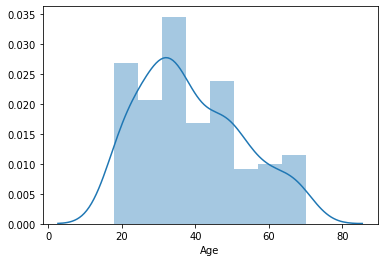

In [39]:
#importing Seaborn library for data visualization
import seaborn as sns

sns.distplot(df["Age"])

In [40]:
df.describe() #This function shows the basic values of dataframe

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [41]:
##Using Scaling technique to fit the data between 0 to 1 range

from sklearn.preprocessing import MinMaxScaler

mn  = MinMaxScaler()
df_sc = mn.fit_transform(df)

In [42]:
new_df = pd.DataFrame(df_sc, columns=df.columns, index=df.index)

In [43]:
new_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [44]:
## Clustering Technique

from sklearn.cluster import KMeans

In [45]:
#Using Kmeans algorithm to cluster the data
km = KMeans(n_clusters=5)

km.fit(new_df)

KMeans(n_clusters=5)

In [46]:
km.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0, 2, 0, 4, 0,
       2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       2, 0, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 3, 3, 4, 3, 1, 3, 1, 3, 1, 3,
       4, 3, 4, 3, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 2, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [47]:
df["labels"]  =km.labels_

In [48]:
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),labels
0,19,15,39,4
1,21,15,81,0
2,20,16,6,4
3,23,16,77,0
4,31,17,40,4
5,22,17,76,0
6,35,18,6,4
7,23,18,94,0
8,64,19,3,2
9,30,19,72,0


<AxesSubplot:>

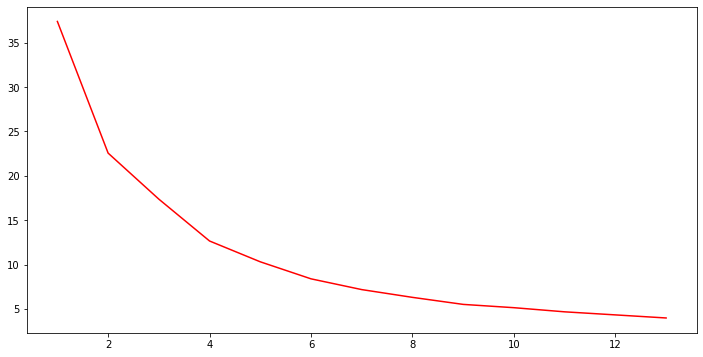

In [49]:
## elbow technique to decide the number of clusters
import matplotlib.pyplot as plt
import seaborn as sns


wcss=[]

for i in range(1,14):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(new_df)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(12,6))
sns.lineplot(range(1,14), wcss, color="red")

In [50]:
km.inertia_

3.972834531962304

### H clustering

In [51]:
### hierarchical clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering
#from sklearn.metrics import pairwise_distances

In [53]:
model = AgglomerativeClustering(linkage="average")

In [54]:
md = model.fit(new_df)

In [55]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [56]:
model = AgglomerativeClustering(linkage="average", n_clusters=5)

In [63]:
md = model.fit_predict(new_df)

In [64]:
df["hcluster_labels"] = model.labels_

In [65]:
df.head(10)

,Age,Annual Income (k$),Spending Score (1-100),labels,hcluster_labels
0,19,15,39,4,1
1,21,15,81,0,2
2,20,16,6,4,1
3,23,16,77,0,2
4,31,17,40,4,1
5,22,17,76,0,2
6,35,18,6,4,1
7,23,18,94,0,2
8,64,19,3,2,1
9,30,19,72,0,2


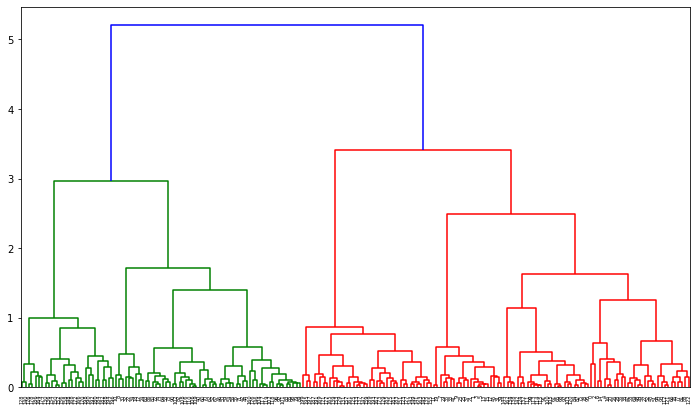

In [66]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
den = shc.dendrogram((shc.linkage(new_df, method="ward")))

In [61]:
#Importing Silhouette_score to get performance of the model
from sklearn.metrics import silhouette_score

In [67]:
silhouette_score(new_df, md)

0.3982883494848387